# **Python code example**

## Silvestrovich Kira

## Install the packages we need


In [2]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 124 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 18.3 MB/s 
     |████████████████████████████████| 678 kB 66.6 MB/s 
     |████████████████████████████████| 11.2 MB 55.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 216 kB 10.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640661 sha256=ebc0148bd21b404e1cdac936b7d2b4b2fffef0c380c08cc011cae7363ef67193
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.

In [3]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

## Task one. FInd the data.



I take the data on the number of sunspots:

http://www.sidc.be/silso/datafiles

https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv

**Description:**

Monthly mean total sunspot number obtained by taking a simple arithmetic mean of the daily total sunspot number over all days of each calendar month. Monthly means are available only since 1749 because the original observations compiled by Rudolph Wolf were too sparse before that year. (Only yearly means are available back to 1700).

Numbers are presented from 1749 to 1983. Collected at Swiss Federal Observatory, Zurich until 1960, then Tokyo Astronomical Observatory.

A value of -1 indicates that no number is available (missing value).

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

ts1 = pd.read_csv(url)

In [ ]:
ts1.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [5]:
ts1[['year','month']] = ts1['Month'].str.split('-', expand=True)
ts1 = ts1.drop(columns=['Month'])
ts1['day'] = 28
ts1['Time'] = pd.to_datetime(ts1.iloc[:, 1:])
ts1 = ts1.drop(columns=['year', 'month', 'day'])
ts1 = pd.Series(ts1.iloc[:, 0].values, index=pd.date_range(start='1749-01', end='1984-01', freq='M'))
ts1

1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
              ... 
1983-08-31    71.8
1983-09-30    50.3
1983-10-31    55.8
1983-11-30    33.3
1983-12-31    33.4
Freq: M, Length: 2820, dtype: float64

Since we have 235 years of data, we will take more than 1 year into the test sample -- 35 years (~15% of the entire sample):


In [6]:
#make a breakdown into train/test
test_size = int(12*35)

train = ts1[:-test_size]
test  = ts1[-test_size:]

In [7]:
test

1949-01-31    119.1
1949-02-28    182.3
1949-03-31    157.5
1949-04-30    147.0
1949-05-31    106.2
              ...  
1983-08-31     71.8
1983-09-30     50.3
1983-10-31     55.8
1983-11-30     33.3
1983-12-31     33.4
Freq: M, Length: 420, dtype: float64

## Task 2  

Construct graphs of series, 

plots of autocorrelation functions, 

graphs with slices of series into years to illustrate seasonality.

In [8]:
!pip install matplotlib==3.1.1

     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.
orbit-ml 1.0.17 requires matplotlib>=3.3.2, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


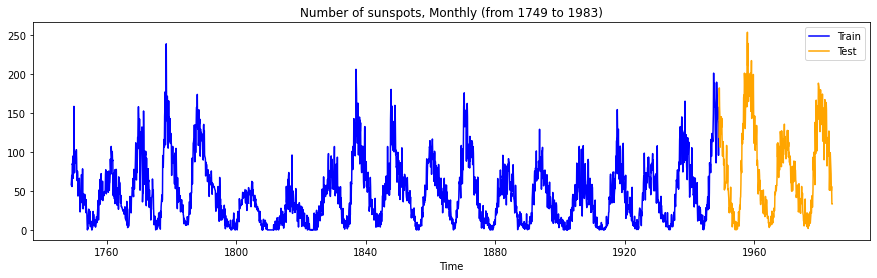

In [9]:
# Graphs of series
plt.figure(figsize=(15, 4))
plt.plot(train, color='blue')
plt.plot(test, color='orange')
plt.xlabel('Time')
plt.legend(["Train","Test"])
plt.title('Number of sunspots, Monthly (from 1749 to 1983)')
plt.show() 

In [10]:
acf1 = acf(train, nlags=12, fft=False)
acf3 = acf(train, nlags=12*10, fft=False)
acf4 = acf(train, nlags=12*20, fft=False)

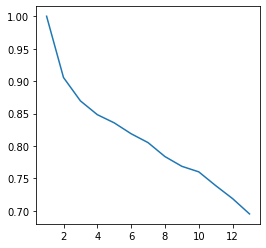

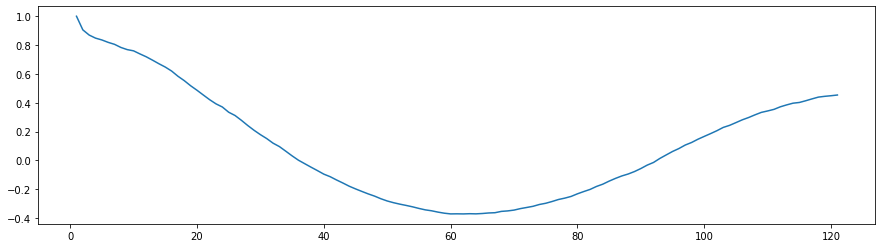

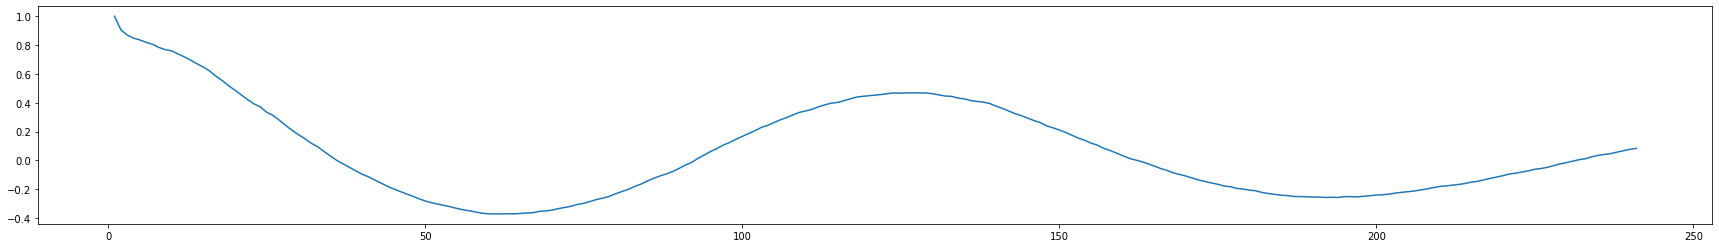

In [11]:
#autocorrelation function graphs
plt.figure(figsize=(4, 4))
plt.plot(np.arange(len(acf1)) + 1, acf1)
plt.show() 

plt.figure(figsize=(15, 4))
plt.plot(np.arange(len(acf3)) + 1, acf3)
plt.show() 

plt.figure(figsize=(30, 4))
plt.plot(np.arange(len(acf4)) + 1, acf4)
plt.show() 

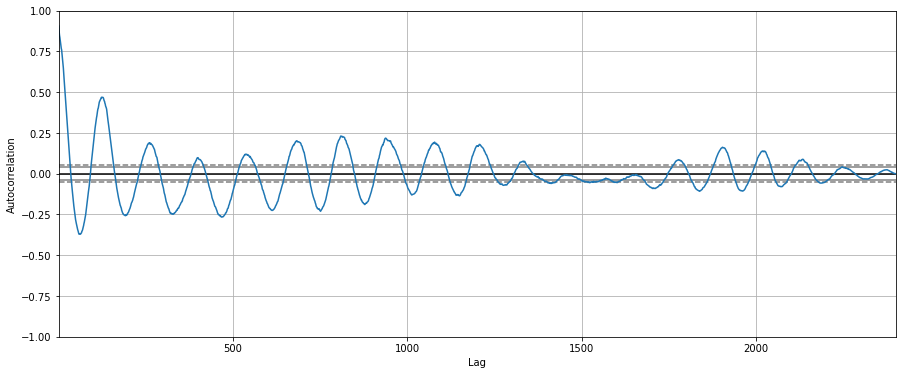

In [12]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15, 6))
autocorrelation_plot(train)

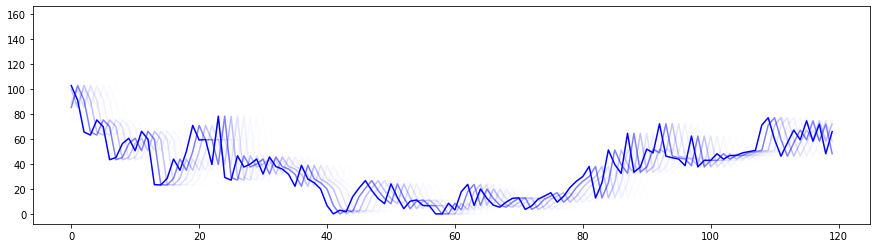

In [13]:
# graphs sliced into years to illustrate seasonality
plt.figure(figsize=[15, 4])

for i in range(train.shape[0] // (120)):
    year = train.iloc[i:i + (120)]
    plt.plot(np.arange(120), year, color = 'b', alpha = 2**((i-20+1)))

## Task 3 


Briefly comment on the resulting graphs. 

* Are the series seasonal?  -- **yes**

* Is there a trend?   -- **no**

* Are the series stationary? -- **no**

* Are there any breaking points? -- **none**

* Is the amplitude of the fluctuating series increasing? -- **no**

Take the logarithm of the series, if your soul is drawn to the logarithm -- it's not, the graph will just get "upside down", nothing interesting.

In [14]:
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (15,10)

Dickey-Fuller criterion: p=0.000000


<Figure size 1800x1440 with 0 Axes>

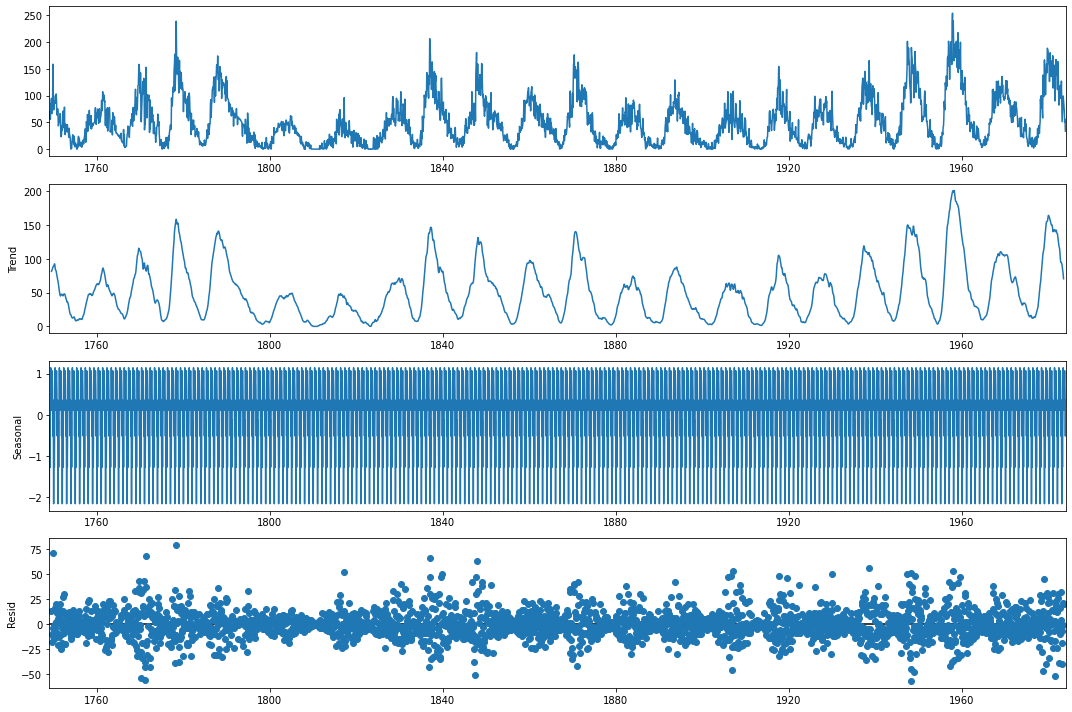

In [16]:
plt.figure(figsize=(25,20))
sm.tsa.seasonal_decompose(ts1).plot()
print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(ts1.values)[1])
plt.savefig('Graph2', dpi = 150)

The time series is clearly seasonal, with seasonality observed about once every 10 years (130 months). There is no trend and no breakpoints. The expectation and variance are not constant, so the series is nonstationary. There is no clear increase in the amplitude of the fluctuations of the series.


## Task 3 

It is necessary to investigate the quality of forecasts of at least 6 models:

### NaiveForecaster: 1  and 2

* $\hat{y}_{t+1} = y_{t}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error

In [ ]:
# y_(t+1) = y_(t)
forecaster = NaiveForecaster(strategy='last')
forecaster.fit(train)

NaiveForecaster()

In [ ]:
horizon = np.arange(len(test)) + 1
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test)

70.76119047619048

* $\hat{y}_{t+1} = y_{t+1-seasonality}$

In [ ]:
# y_(t+1) = y_(t+1-season), в нашем случае сезон это 130 месяцев (10 лет и 10 месяцев)
forecaster = NaiveForecaster(strategy='last', sp=130)
forecaster.fit(train)

NaiveForecaster(sp=130)

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test)

29.088809523809523

### ARIMA and AutoArima

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [ ]:
forecaster = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 130))
forecaster.fit(train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 130))

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test)

71.36871678241046

In [ ]:
forecaster = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
forecaster.fit(train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test)

71.37806512014974

* The Hindman-Handakar Algorithm of Selection SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
forecaster = AutoARIMA()
forecaster.fit(train)

AutoARIMA()

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test)

49.47244637038746

### ETS and ETS with auto AIC

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)

In [ ]:
train_ets = pd.Series(train.values, index=pd.PeriodIndex(train.index))
test_ets = pd.Series(test.values, index=pd.PeriodIndex(test.index))

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [ ]:
forecaster = ExponentialSmoothing(trend='add', seasonal='add')
forecaster.fit(train_ets)

ExponentialSmoothing(seasonal='add', trend='add')

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test_ets)

266.45450580243426

* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
forecaster = AutoETS()
forecaster.fit(train_ets.astype('float64'))

AutoETS()

In [ ]:
pred = forecaster.predict(horizon)
mean_absolute_error(pred, test_ets)

64.83778469614926

## Task 5 

Choose the best model and build a forecasting graph for it one year ahead, using all 100% of the observations as a training sample.

The **Naive Forcaster with seasonality** performed best:

In [ ]:
forecaster = NaiveForecaster(strategy='last', sp=130)
forecaster.fit(train)
preds = forecaster.predict(horizon)

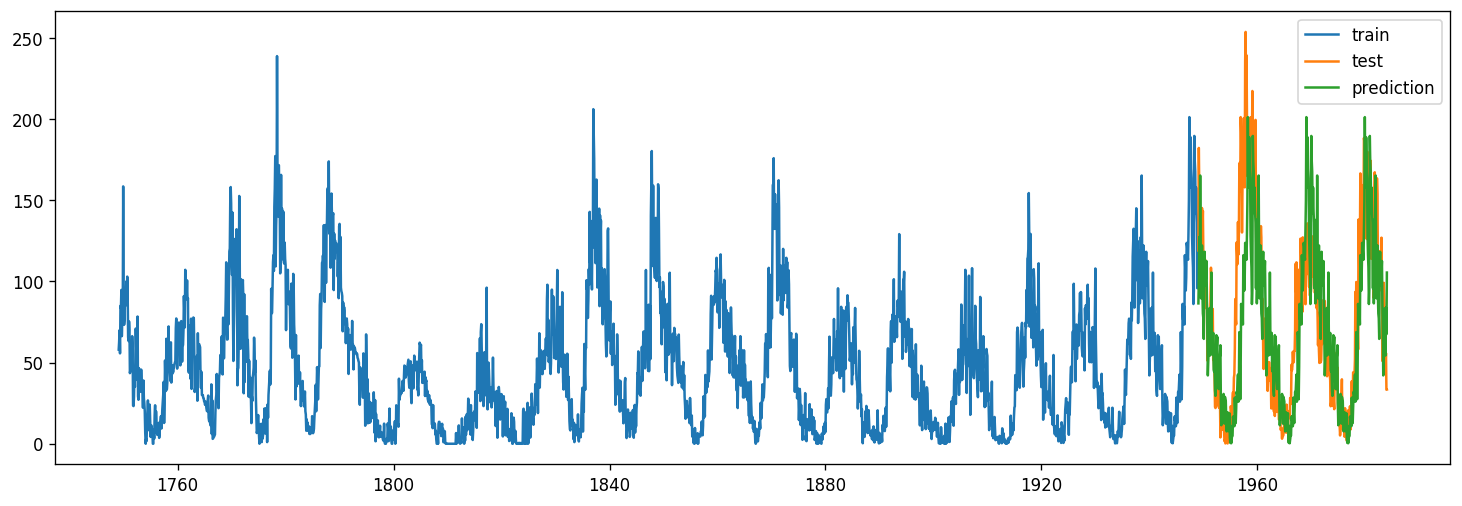

In [ ]:
# нарисуем пресказания для test:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure(dpi=120)

plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(preds, label='prediction')

plt.legend();

In [ ]:
forecaster = NaiveForecaster(strategy='last', sp=130)
forecaster.fit(ts1)
fh = np.arange(len(ts1)/235*35) + 1
preds = forecaster.predict(fh)

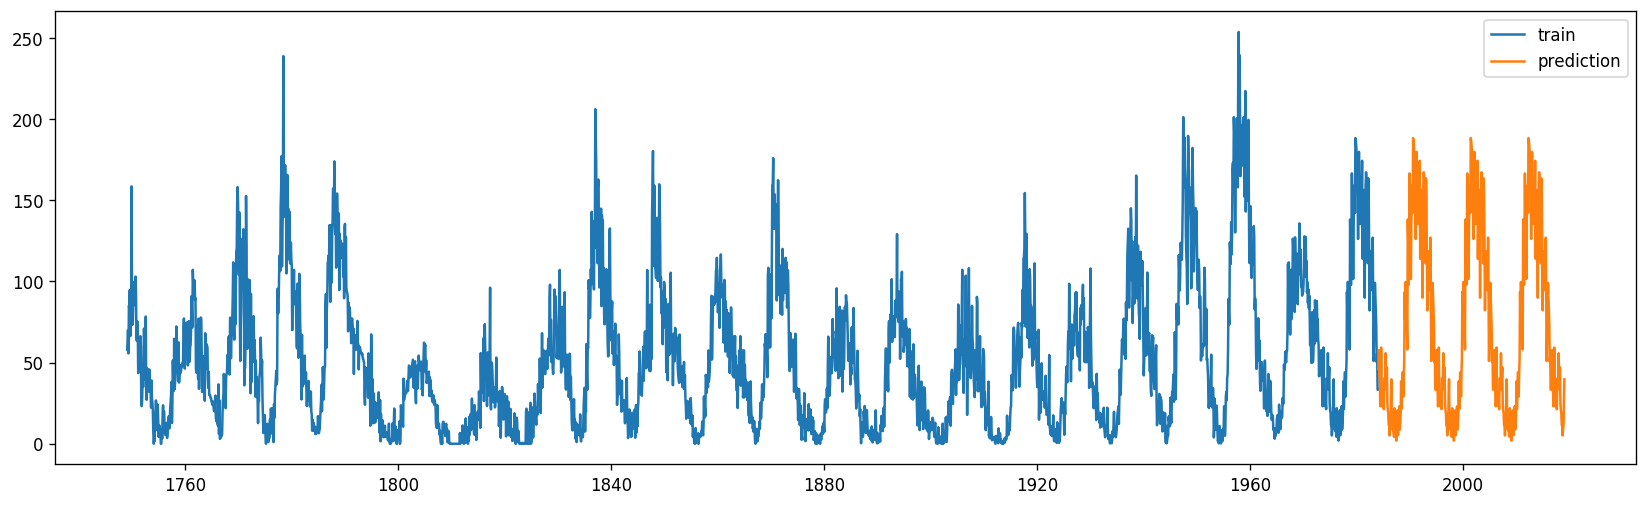

In [ ]:
# нарисуем пресказания для следующих 35 лет:
plt.rcParams["figure.figsize"] = (17,5)
plt.figure(dpi=120)

plt.plot(ts1, label='train')
plt.plot(preds, label='prediction')

plt.legend();